## Setting the environment 

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as pl
# Turn interactive plotting off
pl.ioff()

## Import Iris data 

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
print('The size of the data: ', X.shape)
print('The size of the of the labels is: ', y.shape)


The size of the data:  (150, 4)
The size of the of the labels is:  (150,)


## Clustering -- Kmeans

In [3]:
from sklearn import cluster
clus_model= cluster.KMeans(n_clusters=3)
clus_model.fit(X)

KMeans(n_clusters=3)

In [4]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y,clus_model.labels_)
pl.matshow(cm)
pl.colorbar()
pl.title('Confusion matrix')
pl.ylabel('True label')
pl.xlabel('Predicted label')

Text(0.5, 0, 'Predicted label')

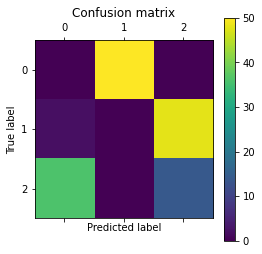

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


In [5]:
pl.show()
print(cm)

You might need to re-label the output. Why?

In [6]:
#cm.max(axis=0)
relabels=np.argmax(cm, axis=0)
print(relabels)

[2 0 1]


In [7]:
y_pred=clus_model.labels_*0
for i in relabels:
    y_pred[clus_model.labels_== i]=relabels[i]
    
#y_pred2=clus_model.labels_*0
#y_pred2[clus_model.labels_==0]=relabels[0]
#y_pred2[clus_model.labels_==1]=relabels[1]
#y_pred2[clus_model.labels_==2]=relabels[2]

## Confusion matrix and report 

In [8]:
cm=confusion_matrix(y,y_pred)
print(cm)

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [9]:
print(classification_report(y, y_pred,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## Plotting results

/tmp/ipykernel_904/1122498349.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig2, rect=[0, 0, .95, 1], elev=48, azim=134)


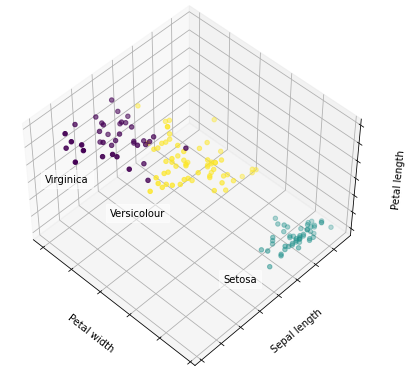

In [10]:
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(5)

fig2 = pl.figure(2, figsize=(7,5))
ax = Axes3D(fig2, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = clus_model.labels_

for name, label in [('Setosa', 0), 
                    ('Versicolour', 1), 
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(), 
              X[y == label, 0].mean() + 1.5, 
              X[y == label, 2].mean(), name,
              horizontalalignment='center', bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# iris.feature_names
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))
ax.w_xaxis.set_ticklabels([]) 
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

/tmp/ipykernel_904/2420791593.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig3, rect=[0, 0, .95, 1], elev=48, azim=134)


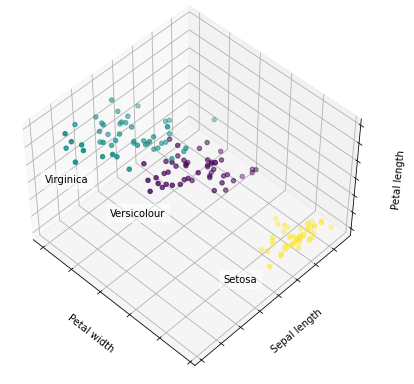

In [11]:
# Plot the ground truth
fig3 = pl.figure(3, figsize=(7, 5))
ax = Axes3D(fig3, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, relabels).astype(np.float)

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

## PCA Iris

The iris datasetcannot be visualized in a single 2D plot, as it has 4 features. 
We are going to extract 2 combinations of sepal and petal dimensions to visualize it

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print ("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (150, 2)


## Plotting

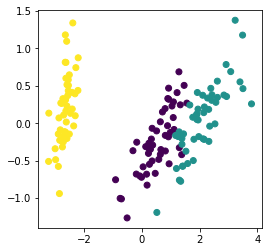

In [13]:
fig4=pl.figure(figsize=(4,4))
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
pl.show()

# Percentage of variance explained for each components

In [14]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461872 0.05306648]
